the year is  2022
the year is  2023
the year is  2024
the year is  2025
the year is  2026
the year is  2027
the year is  2028
the year is  2029
the year is  2030
the year is  2031
the year is  2032
the year is  2033
the year is  2034
the year is  2035
the year is  2036
the year is  2037
the year is  2038
the year is  2039
the year is  2040
the year is  2041
the year is  2042
the year is  2043
the year is  2044
the year is  2045
the year is  2046
the year is  2047
the year is  2048
the year is  2049
the year is  2050
the year is  2051
the year is  2052
the year is  2053
the year is  2054
the year is  2055
the year is  2056
the year is  2057
the year is  2058
the year is  2059
the year is  2060
the year is  2061
the year is  2062
the year is  2063
the year is  2064
the year is  2065
the year is  2066
the year is  2067
the year is  2068
the year is  2069
the year is  2070
the year is  2071
the year is  2072
the year is  2073
the year is  2074
the year is  2075
the year is  2076
the year i

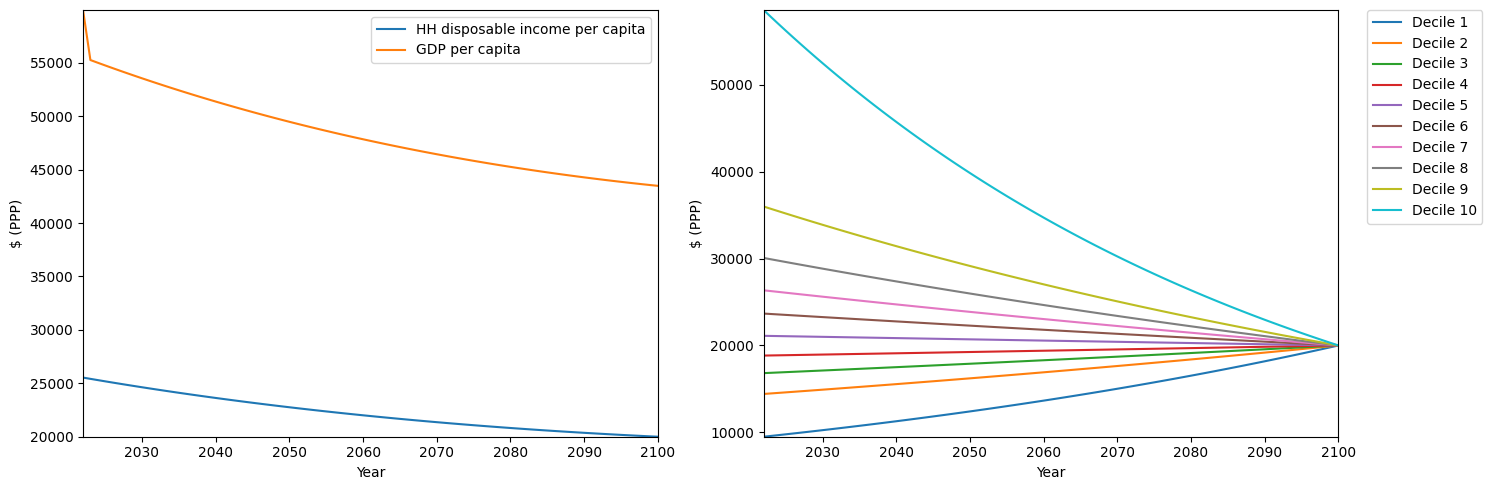

In [2]:
from scenario_class import Scenario
from plots_class import Plots

scenario_params = {"end_year": 2100,
                 "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
            }


scenario_1 = Scenario(scenario_params)

scenario_1.compute_country_scenario_params()
scenario_1.countries["Armenia"].cagr_by_decile
scenario_1.run()

# Access Armenia's data and growth trajectory and plot it
plotting = Plots(scenario_1)
plotting.plot_specific_country_econ("Denmark")


